**Linear Regression**


The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

In [45]:
# Importing libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [46]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(25) #.head() displays first 5 values by default, here it displays 25 values

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


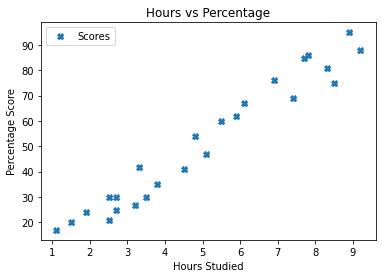

In [47]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='X')  #used to plot the given data 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show() #plot of the data 

In [48]:
# dividing the data  divide the data into "attributes" (inputs) and "labels" (outputs).
X = s_data.iloc[:, :-1].values  #excluding the last column we get the entire data 
y = s_data.iloc[:, 1].values  #row vector of the second column

We split this data into training & test sets now. Using Scikit-Learn's built-in train_test_split() method:

In [49]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
#test_size is taken as 20% (percentage of the data that should be held over for testing) 
#random state is used to validate processing over multiple runs of the code

**Training** **the** **Algorithm**

In [50]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  #Regressor is the independent variable in a regression equation
regressor.fit(X_train, y_train) 

print("Training complete")

Training complete


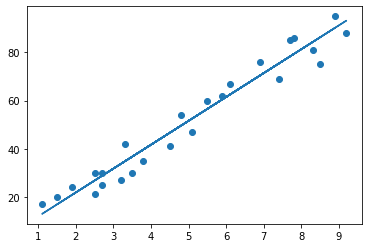

In [51]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_ 
# line of the form y=mx+c where slope 'm' is regressor.coefficient & c is the regressor intercept
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Let's do some MAGIC!!!**
(Time to make some predictions)

In [52]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [53]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [57]:
own = regressor.predict([[9.25]]) 
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**EVALUATING MODEL**

Evaluating the performance of algorithm

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
